In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,734 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
# import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [ ]:
# import test and train file
train = pd.read_excel('/content/2020new (2).xlsx')

apt_df = pd.DataFrame(train)

df = apt_df[['층', '계약년월', '건축년도', '정부청사거리', '주택매매가격지수','전입인구', 'COFIX',
       '금리', '부동산심리지수', '소비자물가지수', '아파트전세가격지수',	'SNS긍정률', '국고채', '보증금', '전용면적', '도시형생활주택']]


# 범주형 변수 더미화
dummies = pd.get_dummies(df[['도시형생활주택']])
df.drop(dummies, axis = 1, inplace = True)
X = pd.concat([df, dummies], axis = 1)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,층,계약년월,건축년도,정부청사거리,주택매매가격지수,전입인구,COFIX,금리,부동산심리지수,소비자물가지수,아파트전세가격지수,SNS긍정률,국고채,보증금,전용면적
0,5,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,105.79,105.5,0.553994,1.303,24000,84.6972
1,2,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,105.79,105.5,0.553994,1.303,21000,84.9544
2,10,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,105.79,105.5,0.553994,1.303,15000,59.6506
3,7,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,105.79,105.5,0.553994,1.303,18000,105.7788
4,11,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,105.79,105.5,0.553994,1.303,23000,105.6138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11615,20,201912,2012,3.243743,101.3,7248,1.81,1.53,120.1,105.12,101.9,0.458615,1.360,19000,101.4500
11616,25,201912,2012,3.243743,101.3,7248,1.81,1.53,120.1,105.12,101.9,0.458615,1.360,17000,84.8100
11617,8,201912,2012,3.243743,101.3,7248,1.81,1.53,120.1,105.12,101.9,0.458615,1.360,21000,114.8400
11618,16,201912,2012,3.243743,101.3,7248,1.81,1.53,120.1,105.12,101.9,0.458615,1.360,25000,114.6100


In [ ]:
# 타깃 변수 지우기
X = X.drop(df[['보증금']],axis =1)
# splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X, df[['보증금']], test_size = 0.3)

In [ ]:
import matplotlib 
# 20개의 변수만 사용하기위해 처리해주었다
X = pd.concat([df, dummies], axis = 1).drop('보증금', axis =1 )
X_columns = X.columns
X = X[X_columns[:20]]
# splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X, df['보증금'], test_size = 0.3)
predictors = x_train.columns


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


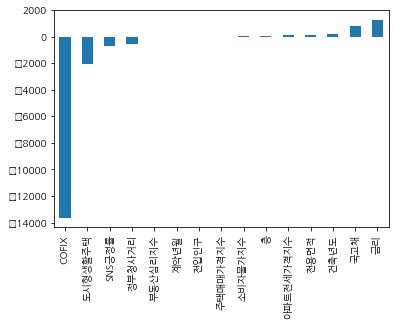

In [ ]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

lassoReg = Lasso(alpha=0.0001, normalize = True)
lassoReg.fit(x_train, y_train)
coef = Series(lassoReg.coef_, predictors).sort_values()
plt.rc('font', family='NanumGothic')
coef.plot(kind = 'bar');

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


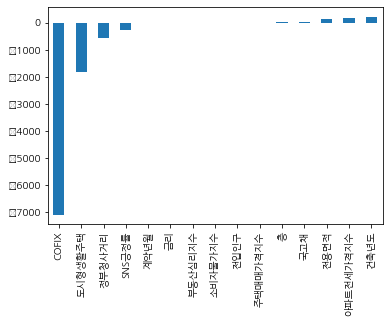

In [ ]:
lassoReg = Lasso(alpha=0.5, normalize = True)
lassoReg.fit(x_train, y_train)
coef = Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind = 'bar');


In [ ]:
# importing linear regression from sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
# training the model
lreg.fit(x_train, y_train)
# evaluation using r-square
lreg.score(x_cv, y_cv)


0.6265547455457912

In [ ]:
# importing Lasso Regression from sklearn
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.005, normalize = True)
# training the model
lassoReg.fit(x_train, y_train)
# evaluation using r-square
lassoReg.score(x_cv, y_cv)


0.6265545160597623

In [ ]:
# importing Lasso Regression from sklearn
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.5, normalize = True)
# training the model
lassoReg.fit(x_train, y_train)
# evaluation using r-square
lassoReg.score(x_cv, y_cv)


0.6235255915459176